In [36]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
## Read Dataset
df=pd.read_csv('E:\Full stack data science-Python pratice\Machine Learning\Machine-Learning-Algorithms\Datasets for Algorithms\weight_height.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

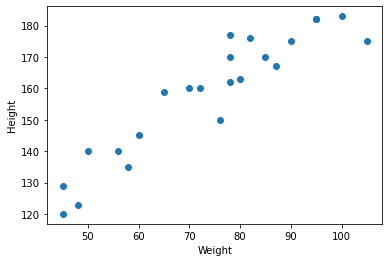

In [38]:
## scatter plot to see ,if there is any linear relation
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

With visualization we can see if weight is increasing then height also is increasing

In [39]:
## To see if this is positive relation then we can check correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


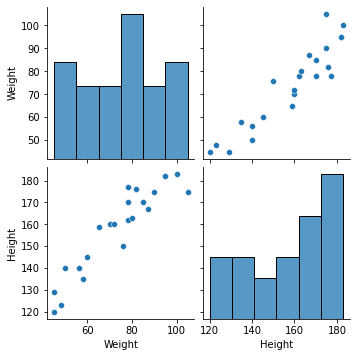

In [40]:
## Seaborn for correlation visualization
import seaborn as sns
sns.pairplot(df)

As there is linear relationship,linear regression can be applied to this problem statement

In [41]:
## Independent and dependent features
X_seris=df['Weight'] ##--> This will give series as 1D array..But have to have independent feature as 2D array/Dataframe as series can create issue while training
X=df[['Weight']]
Y=df['Height']  ##--> Dependent feature can be series

In [42]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [43]:
## Standardization- It has to be done as in linear regression gradient descent is formed and for that we need standardized data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
## Apply linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [45]:
## This throws error as mentioned earlier series will have issue while training
regressor.fit(X_seris,Y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 45  58  48  60  70  78  80  90  95  78  82  95 105 100  85  78  50  65
  76  87  45  56  72].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
## Fit the training data
regressor.fit(X_train,Y_train)

LinearRegression()

In [49]:
print("Coefficeint or slopw:",regressor.coef_)

Coefficeint or slopw: [17.2982057]


In [50]:
print("Intercept:",regressor.intercept_)

Intercept: 156.47058823529412


coefficient is 17.28 -It says that 1 unit movement is wt will result in 17.29 unit movement in ht.

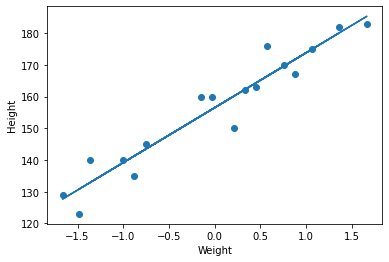

In [57]:
## Plotting the line w.r.t. to training data
plt.scatter(X_train,Y_train)
plt.xlabel("Weight")
plt.ylabel('Height')
plt.plot(X_train,regressor.predict(X_train))

For Prediction of test data -
Y_pred=17.29* X_test + 156.47

In [58]:
## Prediction
reg_pred=regressor.predict(X_test)

In [60]:
## Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(Y_test,reg_pred)
mae=mean_absolute_error(Y_test,reg_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 114.84069295228699
Mean Absolute Error: 9.66512588679501
Root Mean Squared Error: 10.716374991212605


In [61]:
score=r2_score(Y_test,reg_pred)
print("R2 Score=",score)

R2 Score= 0.7360826717981276


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
where:
R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [62]:
adjusted_R2=1-(((1-score)*(len(Y_test)-1))/(len(Y_test-X_test.shape[1])))
print("Adjusted R2 score",adjusted_R2)

Adjusted R2 score 0.7800688931651063


In [63]:
## OLS Linear Regression
import statsmodels.api as sm

In [67]:
model=sm.OLS(Y_train,X_train).fit()

In [68]:
pred_val=model.predict(X_test)
print(pred_val)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [70]:
model.summary()

d:\Anaconda\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                       0.664
Time:                        20:16:18   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
## Prediction for new data
## Make sure to add new weight in 2D array
regressor.predict([[10]])

array([329.45264528])

We are getting such random output as we missed to scale the test data as we did for training

In [75]:
new_wt=scaler.transform([[10]])
print(new_wt)

[[-3.78446724]]


d:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [76]:
predicted_ht=regressor.predict(new_wt)
print("Predicted Height:",predicted_ht)

Predicted Height: [91.00609539]
